# Подгрузка библиотек

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from time import process_time
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import time

import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# подгрузка данных

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/diploma/BHK_train.xlsx")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['TARGET'].value_counts(normalize=True)

# отбор параметров

In [ ]:
for i in df.columns:
    print(i, df[i][df[i]==0].count())

In [ ]:
df6 = df.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1)

In [ ]:
df7 = df6.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1)

In [ ]:
df7 = pd.get_dummies(df7)

In [ ]:
df7 = df7.drop(['SK_ID_CURR'], axis = 1)

In [ ]:
for i in df7.columns:
    print(i, df7[i][df7[i]==0].count())

In [ ]:
df7 = df7.drop(['ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_Transport: type 3', 'ORGANIZATION_TYPE_Transport: type 2', 'ORGANIZATION_TYPE_Transport: type 1', 'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 2', 'ORGANIZATION_TYPE_Trade: type 1', 'ORGANIZATION_TYPE_Telecom', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Security Ministries', 'ORGANIZATION_TYPE_Restaurant', 'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Realtor', 'ORGANIZATION_TYPE_Postal', 'ORGANIZATION_TYPE_Police', 'ORGANIZATION_TYPE_Mobile', 'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Industry: type 8', 'ORGANIZATION_TYPE_Industry: type 7', 'ORGANIZATION_TYPE_Industry: type 6', 'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Industry: type 4', 'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Industry: type 12', 'ORGANIZATION_TYPE_Industry: type 11', 'ORGANIZATION_TYPE_Industry: type 10', 'ORGANIZATION_TYPE_Industry: type 1', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Agriculture', 'ORGANIZATION_TYPE_Advertising', 'OCCUPATION_TYPE_Waiters/barmen staff', 'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Private service staff', 'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_HR staff', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_FAMILY_STATUS_Unknown', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Businessman', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Group of people', 'CODE_GENDER_XNA'], axis=1)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [ ]:
correlation(df7, 0.9)

        TARGET  ...  ORGANIZATION_TYPE_Transport: type 4
0            1  ...                                    0
1            0  ...                                    0
2            0  ...                                    0
3            0  ...                                    0
4            0  ...                                    0
...        ...  ...                                  ...
307506       0  ...                                    0
307507       0  ...                                    0
307508       0  ...                                    0
307509       1  ...                                    0
307510       0  ...                                    0

[307511 rows x 101 columns]


# Балансировка выборки

In [ ]:
df7.group

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,0.0,-617.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,-1106.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,15,0,0,0,0,0,0,0.681632,NaN,0.0,0.0,0.0,-273.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,0,72000.0,269550.0,12001.5,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,8,0,0,0,0,0,

In [ ]:
df7_0 = df7_1

In [ ]:
df7_1

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,...,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-9461.0,-637.0,-2120.0,-1134.0,-3648.0,2.0,2.0,0.262949,0.139376,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018801,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,27076.5,979992.0,112500.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,-18724.0,-2628.0,-1827.0,-161.0,-6573.0,1.0,0.0,0.548477,0.190706,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018029,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,35028.0,1193580.0,202500.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,-17482.0,-1262.0,-1029.0,-1075.0,-1182.0,0.0,0.0,0.306841,0.320163,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025164,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42,16258.5,288873.0,135000.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,-13384.0,-3597.0,-4409.0,-1480.0,-45.0,0.0,0.0,0.674203,0.399676,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.007305,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81,14593.5,252000.0,81000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,-24794.0,365243.0,-4199.0,0.0,-5391.0,1.0,1.0,0.023952,0.720944,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028663,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df_balance = df7_1.append(df7_0.iloc[0:24825])

In [ ]:
df_balance

In [ ]:
impute = SimpleImputer(strategy='most_frequent')
df_bal = impute.fit_transform(df_balance)

In [ ]:
df_balan = pd.DataFrame(df_bal, columns = df_balance.iloc[:,0:].columns)

In [ ]:
df_balan

In [ ]:
imputer = SimpleImputer()
imputer.fit(df_balance.iloc[:,1:].values)
df_imputer = imputer.transform(df_balance.iloc[:,1:].values)

In [ ]:
df9 = df_imputer

In [ ]:
df_bal = pd.DataFrame(data = df9, columns = df_balance.iloc[:,1:].columns)
df_bal['TARGET'] = df_balance['TARGET']

df_bal.head()

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,406597.5,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-9461.0,-637.0,-2120.0,-1134.0,-3648.0,2.0,2.0,0.262949,0.139376,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018801,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,979992.0,112500.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,-18724.0,-2628.0,-1827.0,-161.0,-6573.0,1.0,0.0,0.548477,0.190706,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018029,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1193580.0,202500.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,-17482.0,-1262.0,-1029.0,-1075.0,-1182.0,0.0,0.0,0.306841,0.320163,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025164,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,288873.0,135000.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,-13384.0,-3597.0,-4409.0,-1480.0,-45.0,0.0,0.0,0.674203,0.399676,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.007305,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,252000.0,81000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,-24794.0,365243.0,-4199.0,0.0,-5391.0,1.0,1.0,0.023952,0.720944,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028663,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_bal.TARGET

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49645    NaN
49646    NaN
49647    1.0
49648    NaN
49649    1.0
Name: TARGET, Length: 49650, dtype: float64

# Заполнение пропусков

In [ ]:
#pip install missingpy

In [ ]:
!pip install catboost

In [ ]:
#from missingpy import MissForest

In [ ]:
#imputer = MissForest()
#df_imputed = imputer.fit_transform(df7)\

In [ ]:
"""Imputer_missforest = IterativeImputer(estimator=RandomForestClassifier(n_estimators = 10, random_state=0), max_iter=7, random_state=0)
df_impute = Imputer_missforest.fit_transform(df7)"""

In [ ]:
impute = SimpleImputer(strategy='most_frequent')
df8 = pd.DataFrame(impute.fit_transform(df7), columns = df7.iloc[:,0:].columns)

In [ ]:
df8

In [ ]:
df10 = df7[df7['TARGET'] == 0]

In [ ]:
df11 = df7[df7['TARGET'] == 1]

In [ ]:
df11

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26,1,0,112500.0,979992.0,27076.5,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,0.0,-161.0,1,0,0.0,0.0,0.0,0.0,2.0,2.0,1,...,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40,1,0,202500.0,1193580.0,35028.0,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,-1075.0,1,0,0.0,0.0,0.0,2.0,0.0,4.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42,1,0,135000.0,288873.0,16258.5,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,0.0,-1480.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
81,1,0,81000.0,252000.0,14593.5,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,2.0,2,10,0,0,0,0,0,0,0.023952,0.720944,1.0,1.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,1,1,207000.0,450000.0,32746.5,0.020246,-9918,-3048,-8507.0,-2580,1,1,1,1,0,0,3.0,3,16,0,0,0,0,0,0,0.329708,0.360613,0.0,0.0,0.0,-324.0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307475,1,1,144000.0,1303200.0,46809.0,0.007330,-13416,-2405,-500.0,-4704,1,1,1

In [ ]:
df_balance = df11.append(df10.iloc[1000:25830])

In [ ]:
df8

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4
0,1.0,0.0,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262949,0.139376,2.0,2.0,2.0,-1134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622246,0.746300,1.0,0.0,0.0,-828.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555912,0.729567,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650442,0.746300,2.0,0.0,0.0,-617.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.322738,0.746300,0.0,0.0,0.0,-1106.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df_balance.tail()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4
44599,0,0,112500.0,269550.0,14242.5,0.007120,-23719,365243,-12223.0,-4715,1,0,0,1,1,0,2.0,2,13,0,0,0,0,0,0,0.262258,0.579727,1.0,0.0,0.0,-749.0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44600,0,2,180000.0,526491.0,22261.5,0.032561,-12366,-1620,-528.0,-4798,1,1,0,1,0,0,4.0,1,18,0,0,0,0,0,0,0.658915,0.803885,0.0,0.0,0.0,-420.0,1,0,0.0,0.0,0.0,0.0,2.0,0.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44602,0,0,81000.0,894766.5,29569.5,0.009657,-18077,-701,-11362.0,-1627,1,1,1,1,1,0,2.0,2,10,0,0,0,0,0,0,0.480708,0.332851,0.0,0.0,0.0,-1219.0,1,0,0.0,0.0,0.0,0.0,0.0,4.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
44603,0,0,180000.0,755190.0,36459.0,0.008625,-18667,-2150,-716.0,-2133,1,1,1,1,0,0,2.0,2,10,0,0,0,0,0,0,0.502019,0.700184,5.0,0.0,0.0,-2254.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44604,0,2,292500.0,553581.0,40414.5,0.001276,-10119,-1999,-768.0,-2805,1,1,0,1,0,0,4.0,2,10,0,0,0,0,0,0,0.603979,0.526295,1.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10

In [ ]:
"""Imputer_missforest = IterativeImputer(estimator=RandomForestClassifier(n_estimators = 10, random_state=0), max_iter=7, random_state=0)
df_impute = Imputer_missforest.fit_transform(df7)"""

In [ ]:
"""from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
df_no_nan = imputer.fit_transform(df7)"""


In [ ]:
df_test = df8.iloc[0:147511]

X_df_test = df_test.drop('TARGET', axis = 1)
Y_df_test = df_test['TARGET']

In [ ]:
df_train = df8.iloc[147511::]
df_train

# Построение моделей


In [ ]:
X = df8.drop('TARGET', axis = 1).values
y = df8.TARGET.values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=2)

In [ ]:
def scale_features(df):
  scaled = preprocessing.StandardScaler().fit_transform(df)
  scaled = pd.DataFrame(scaled, columns = df.columns)
  return scaled

In [ ]:
from sklearn import preprocessing
df_features = df8.drop('TARGET', axis = 1)
X_scaled = scale_features(df_features)
X_scaled

In [ ]:
"""pca = PCA(n_components=50)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)"""

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
import sklearn.metrics as metrics

In [ ]:
zzz = GridSearchCV(cv = 3, estimator = LogisticRegression(penalty='elasticnet', solver='saga'), param_grid = {'l1_ratio': [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]})

In [ ]:
zzz.fit(X_train, y_train)

In [ ]:
sorted(zzz.cv_results_.keys)

<function dict.keys>

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy 0.9193852597622206


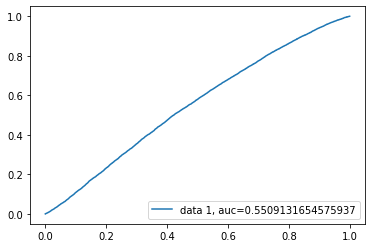



Площадь под ROC-кривой по вероятностям 0.5509131654575937
MSE0.0806


In [ ]:
clf = LogisticRegression(penalty='l2', solver='saga')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
print("MSE" + str(round(MSE(y_test, clf.predict(X_test)), 4)))

In [ ]:
clf.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy 0.9193852597622206


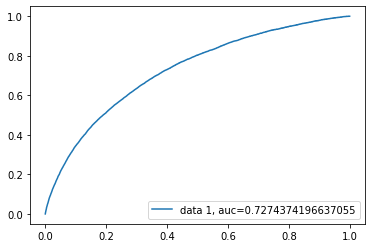



Площадь под ROC-кривой по вероятностям 0.7274374196637055
MSE0.0806


In [ ]:
rf = RandomForestClassifier(n_estimators= 100, max_depth=7, random_state=11, criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, rf.predict(X_test)))
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
print("MSE" + str(round(MSE(y_test, rf.predict(X_test)), 4)))

In [ ]:
stack_df = pd.DataFrame()

In [ ]:
stack_df['rf'] = rf.predict(X_test)

In [ ]:
stack_df['clf'] = clf.predict(X_test)

NameError: ignored

In [ ]:
stack_df.append(pd.Series(y_test), ignore_index=True)

NameError: ignored

In [ ]:
zzz = GridSearchCV(cv = 5, estimator = GBoost(), param_grid = {'learning_rate': [0.01, 0.02, 0.05, 0.06, 0.1]})

Accuracy 0.9207375


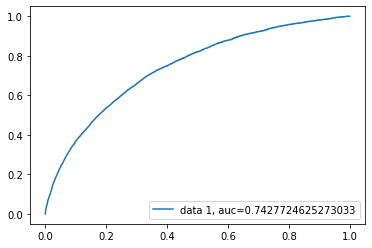



Площадь под ROC-кривой по вероятностям 0.5589711386865608
MSE0.0793


In [ ]:
GB = GBoost()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, GB.predict(X_test)))
y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_test, GB.predict_proba(X_test)[:,1])))
print("MSE" + str(round(MSE(y_test, GB.predict(X_test)), 4)))

Accuracy 0.9206375


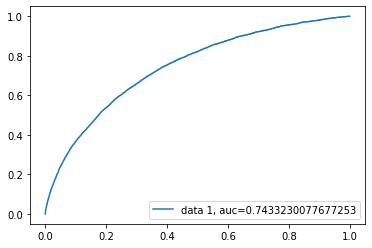



Площадь под ROC-кривой по вероятностям 0.7433230077677253
MSE0.0794


In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, XGB.predict(X_test)))
y_pred_proba = XGB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_test, XGB.predict_proba(X_test)[:,1])))
print("MSE" + str(round(MSE(y_test, XGB.predict(X_test)), 4)))

Accuracy 0.920525


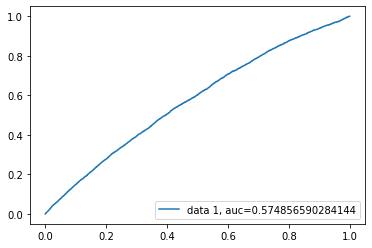



Площадь под ROC-кривой по вероятностям 0.574856590284144
MSE0.0795


In [ ]:
SVM = SVC(probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, SVM.predict(X_test)))
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_test, SVM.predict_proba(X_test)[:,1])))
print("MSE" + str(round(MSE(y_test, SVM.predict(X_test)), 4)))

# Нейросети


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras

In [ ]:
from sklearn import preprocessing
df_features = df_balance.drop('TARGET', axis = 1)
X_scaled = scale_features(df_features)
X_scaled
X = X_scaled.values
y = df_balance.TARGET.values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
'''model = Sequential()
model.add(Dense(100, input_dim = 100, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(50, input_dim=100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))'''

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['AUC'])
model.fit(X_train, y_train, epochs = 50, batch_size=20)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred1 = y_pred.round()

In [ ]:
y_pred[0:200]

Accuracy 0.920525


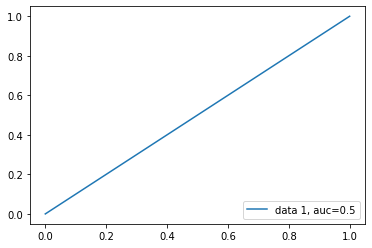

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred1))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred[600:670]

array([[0.08367357],
       [0.08367357],
       [0.08367357],
       [0.04943851],
       [0.07491694],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.04943851],
       [0.04998071],
       [0.08367357],
       [0.07491694],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.07450828],
       [0.08367357],
       [0.05038132],
       [0.04998071],
       [0.08367357],
       [0.07450828],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.04998071],
       [0.07491694],
       [0.05310152],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.08367357],
       [0.04943851],
       [0.08367357],
       [0.083

In [ ]:
count([y_pred])

# Выгрузка данных

In [ ]:
y_test2 = rf.predict_proba(X_to_pred)[:,1]
y_test2

df_send = df[~not_nan]
df_send.TARGET = y_test2

df_send.sample(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
6690,107806,0.068,Cash loans,F,N,Y,0,112500.0,170640.0,11403.0,135000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008230,-20023,-1891,-11411,-3449,NaN,1,1,0,1,1,0,Core staff,2,2,2,WEDNESDAY,11,0,0,0,0,1,1,...,NaN,0.0128,NaN,0.0000,NaN,block of flats,0.0099,"Stone, brick",No,0.0,0.0,0.0,0.0,-815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6302,107356,0.072,Cash loans,F,N,Y,2,90000.0,45000.0,4581.0,45000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007020,-15420,-7220,-7750,-4866,NaN,1,1,1,1,1,0,Private service staff,4,2,2,SATURDAY,15,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2495,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
6788,107918,0.044,Cash loans,F,N,Y,1,126000.0,1078200.0,31653.0,900000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.028663,-15689,-5947,-2961,-3627,NaN,1,1,0,1,0,0,Medicine staff,3,2,2,FRIDAY,12,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1672,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6359,107422,0.052,Cash loans,F,N,Y,0,63000.0,888840.0,32053.5,675000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,0.004960,-17770,-775,-5219,-1309,NaN,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,10,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.0,-392,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6046,107075,0.048,Cash loans,F,N,Y,1,135000.0,628114.5,25218.0,477000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16053,-1807,-5167,-4194,NaN,1,1,0,1,1,0,Sales staff,2,2,2,WEDNESDAY,15,0,0,0,0,0,0,...,0.1018,0.1191,0.0000,0.0000,reg oper account,block of flats,0.0920,Panel,No,1.0,0.0,1.0,0.0,-1788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
6033,107061,0.072,Cash loans,F,N,Y,0,135000.0,543037.5,43033.5,463500.0,"Spouse, partner",Commercial associate,Higher education,Civil marriage,House / apartment,0.018850,-10091,-1525,-5673,-2769,NaN,1,1,0,1,0,1,NaN,2,2,2,MONDAY,13,0,0,0,0,0,0,...,0.1231,0.1515,0.0039,0.0007,NaN,block of flats,0.1225,"Stone, brick",No,4.0,0.0,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5970,106993,0.060,Cash loans,M,N,N,0,270000.0,275040.0,13374.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.009549,-11809,-1054,-328,-349,NaN,1,1,0,1,0,0

In [ ]:
df_send.to_excel("xxx.xlsx")